### Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data Set

In [2]:
data = pd.read_csv('Telco_Customer_Churn.csv')

### Look at the Data / Preprocessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dtypes = data.dtypes
catagorize=dtypes.to_frame()
catagorize.columns=(['type'])        

In [7]:
catagorize['type'].value_counts()

object     18
int64       2
float64     1
Name: type, dtype: int64

In [8]:
catagorize[catagorize['type']=='object']

,type
customerID,object
gender,object
Partner,object
Dependents,object
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object


In [9]:
catagorize[catagorize['type']=='int64']

,type
SeniorCitizen,int64
tenure,int64


In [10]:
catagorize[catagorize['type']=='float64']

,type
MonthlyCharges,float64


In [11]:
data['TotalCharges'].isnull().sum()

0

In [12]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
## Replace ''

data['TotalCharges'] = data['TotalCharges'].replace(' ',0)

In [14]:
data['TotalCharges'].dtypes

dtype('O')

In [15]:
## Convert Total Charges into float

data['TotalCharges'] = data['TotalCharges'].astype(float)

#### Check duplicates, Null, Outliers

In [16]:
## NULL

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
## Duplicates

data.duplicated().sum()

0

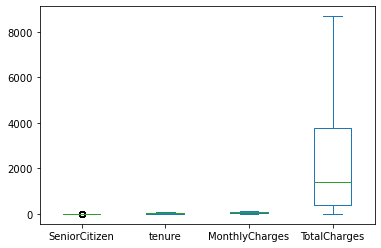

In [18]:
## Outliers

data.plot.box()
plt.show()


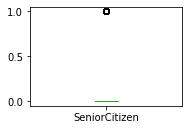

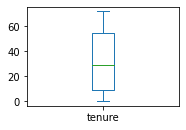

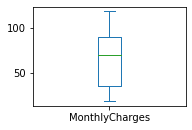

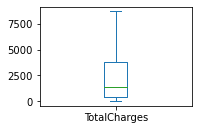

In [19]:
plt.subplot(2,2,1)

data['SeniorCitizen'].plot.box()

plt.show()


plt.subplot(2,2,2)
data['tenure'].plot.box()

plt.show()



plt.subplot(2,2,3)
data['MonthlyCharges'].plot.box()

plt.show()


plt.subplot(2,2,3)
data['TotalCharges'].plot.box()

plt.show()

#### Categorizing Features in Categorical and Numerical

In [20]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']

#### Calculate Churn Ratios for all Categorical Features

In [21]:
for column in cat_features:
    print('Column : ', column)
    print(pd.crosstab(data[column],data['Churn'],normalize='index')*100 )
    print('-'*100)

Column :  gender
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338
----------------------------------------------------------------------------------------------------
Column :  SeniorCitizen
Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261
----------------------------------------------------------------------------------------------------
Column :  Partner
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903
----------------------------------------------------------------------------------------------------
Column :  Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237
----------------------------------------------------------------------------------------------------
Colu

### Univariate findings:
##### Gender : No effect
##### Senior Citizen : Churns more
##### With Partner / Dependents : Churns less
##### Fiber Optic(Internet Dervice) : Churns Most
##### Monthly Plan (Contract) : Churns Most
##### No Device Protection / No Tech Support (Device Protecion and Tech Support) : Churned
##### Electronic Cheque (Paymnt Method) : Churn More

### EDA

### Churn rate by segments

In [22]:
custo_count = data.groupby(['InternetService', 'Contract']).size().reset_index()
custo_count=custo_count.pivot_table(index='InternetService',columns='Contract',values = 0,aggfunc=sum,margins=True)
custo_count

Contract,Month-to-month,One year,Two year,All
InternetService,,,,
DSL,1223,570,628,2421
Fiber optic,2128,539,429,3096
No,524,364,638,1526
All,3875,1473,1695,7043


In [23]:
def conversion(x):
    if x == "Yes":
        return 1
    return 0
    

In [24]:
data['target'] = data['Churn'].apply(conversion)


In [25]:
churn_counts = data[data['target']==1].groupby(['InternetService', 'Contract']).size().reset_index()
churn_counts = churn_counts.pivot_table(index='InternetService',columns='Contract',values = 0 ,aggfunc=sum ,margins=True)

In [26]:
## Churn Rate by Segment - contract X internet Servise

(churn_counts/custo_count).round(2)

Contract,Month-to-month,One year,Two year,All
InternetService,,,,
DSL,0.32,0.09,0.02,0.19
Fiber optic,0.55,0.19,0.07,0.42
No,0.19,0.02,0.01,0.07
All,0.43,0.11,0.03,0.27


Fiber Optic on Month-Month Chrn THe most

#### Avg tenure for each segment

In [27]:
data.groupby(['Contract', 'InternetService', 'Churn'])['tenure'].mean().round(2).reset_index()\
  .pivot_table(index='Churn', columns=['InternetService', 'Contract'], values='tenure')

InternetService            DSL                      Fiber optic           \
Contract        Month-to-month One year Two year Month-to-month One year   
Churn                                                                      
No                       18.62    40.97    59.03          27.91    52.26   
Yes                       9.65    35.79    64.83          16.28    51.40   

InternetService                      No                    
Contract        Two year Month-to-month One year Two year  
Churn                                                      
No                 65.39          10.11    29.72    48.71  
Yes                62.48           4.89    24.56    45.20

Churned customers have lower avg tenure than non-churned for a service and contrac

In [28]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [29]:
from pivottablejs import pivot_ui
pivot_ui(data)

### Visual EDA

In [ ]:
#### Univariate Distribution - Numerical

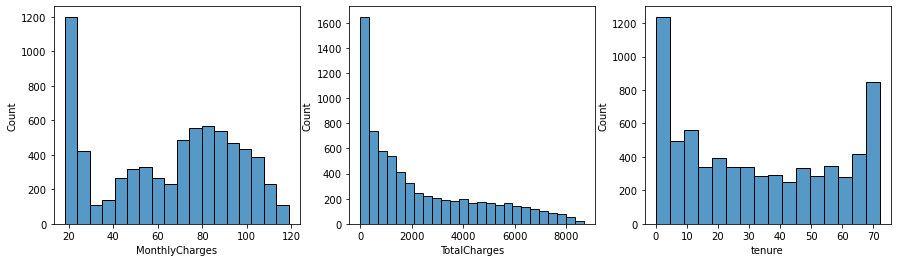

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(data.MonthlyCharges ,ax = axs[0])
sns.histplot(data.TotalCharges,ax=axs[1])
sns.histplot(data.tenure,ax=axs[2])

plt.show()

In [ ]:
### Distribution by Target Variable

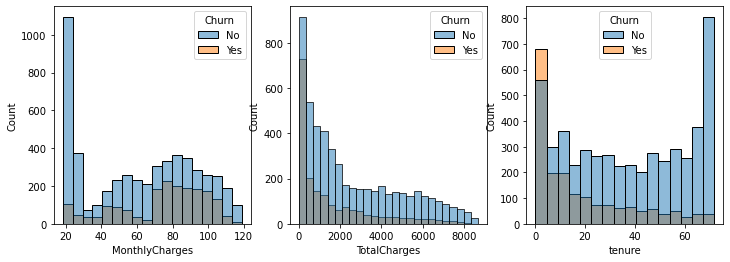

In [49]:
f, ax = plt.subplots(ncols=3, figsize=(12,4))
sns.histplot(data, x="MonthlyCharges", hue="Churn", ax=ax[0])
sns.histplot(data, x="TotalCharges", hue="Churn", ax=ax[1])
sns.histplot(data, x="tenure", hue="Churn", ax=ax[2])


plt.show()

In [ ]:
#### Univariate Distribution - Categorical

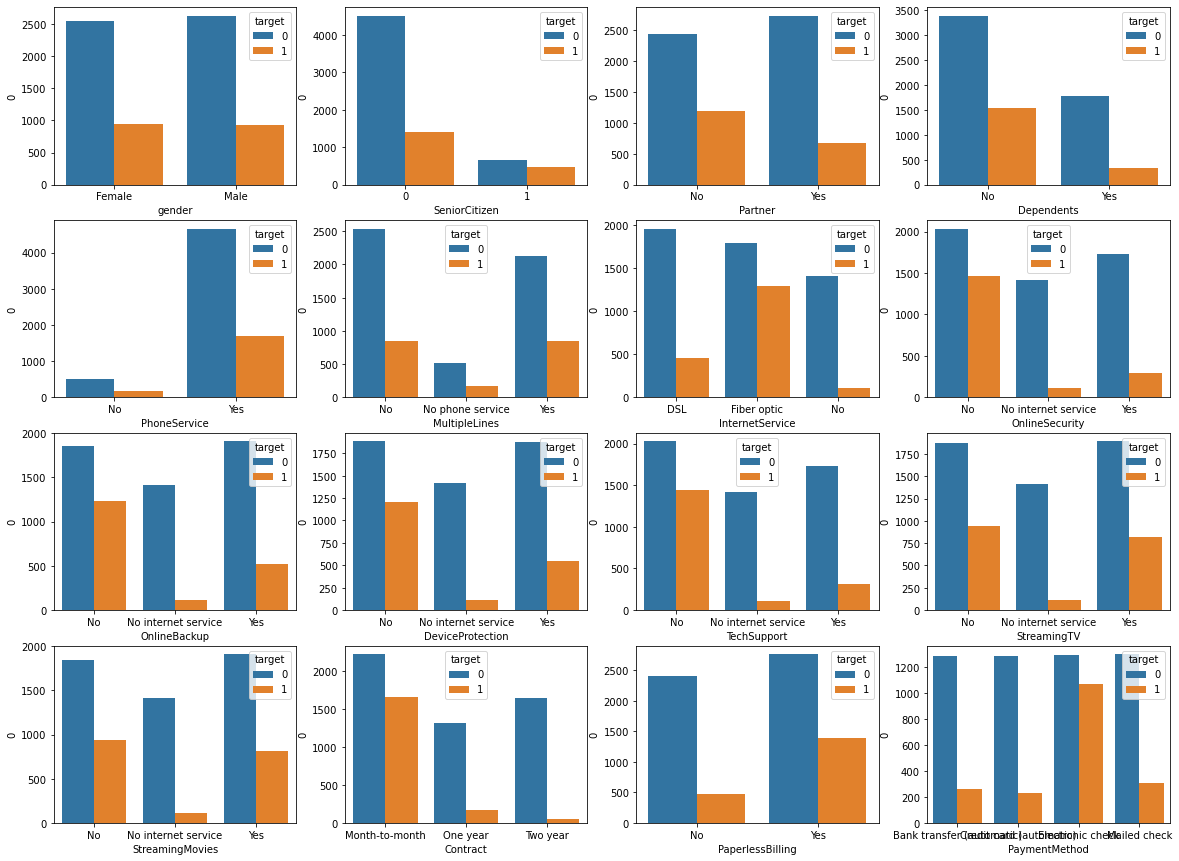

In [51]:
f, ax = plt.subplots(4,4,figsize=(20,15))
axes = [a for sublist in ax for a in sublist]
for i,c in enumerate(cat_features):
    a = data.groupby([c,'target']).size().reset_index()
    sns.barplot(data=a,x=c, y=0, hue='target',ax=axes[i])

In [ ]:
## Bivariate Distribution 

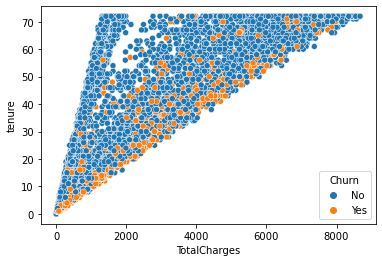

In [60]:
sns.scatterplot(data=data,x='TotalCharges',y='tenure',hue = 'Churn')

plt.show()


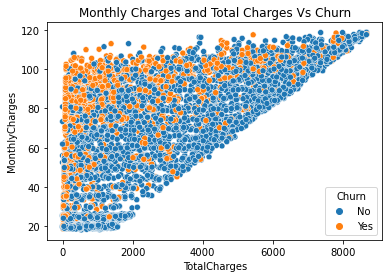

In [59]:
sns.scatterplot(data=data,x='TotalCharges',y='MonthlyCharges',hue = 'Churn')
plt.title('Monthly Charges and Total Charges Vs Churn')

plt.show()


### Feature Eng

In [153]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Binarizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix
from sklearn.compose import make_column_transformer

In [63]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
df = data.drop(['customerID','Churn'],axis=1)

In [168]:
df = data.drop(['Churn'],axis=1)

In [169]:
df 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [174]:
df[numerical_features].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [175]:
df[cat_features].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [176]:
binary_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
              'PaperlessBilling']
cat_col = list(set(cat_features) - set(binary_col))

In [177]:
df_binary = pd.get_dummies(df[binary_col],drop_first=True)

bin_cols = list(df_binary.columns)

In [179]:
bin_cols

['SeniorCitizen',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'PaperlessBilling_Yes']

In [114]:
df_binary

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,0,1,0,0,1
1,0,1,0,0,1,0
2,0,1,0,0,1,1
3,0,1,0,0,0,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
7038,0,1,1,1,1,1
7039,0,0,1,1,1,1
7040,0,0,1,1,0,1
7041,1,1,1,0,1,1


In [180]:
df2 = df.drop(binary_col,axis=1)

df2 = pd.concat([df2,df_binary],axis = 1)


In [181]:
df2

,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,MonthlyCharges,TotalCharges,target,Churn,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,...,29.85,29.85,0,No,0,0,1,0,0,1
1,34,No,DSL,Yes,No,Yes,No,No,No,One year,...,56.95,1889.50,0,No,0,1,0,0,1,0
2,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,53.85,108.15,1,Yes,0,1,0,0,1,1
3,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,...,42.30,1840.75,0,No,0,1,0,0,0,0
4,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,...,70.70,151.65,1,Yes,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,...,84.80,1990.50,0,No,0,1,1,1,1,1
7039,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,...,103.20,7362.90,0,No,0,0,1,1,1,1
7040,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,...,29.60,346.45,0,No,0,0,1,1,0,1
7041,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,...,74.40,306.60,1,Yes,1,1,1,0,1,1


In [204]:
X= df2[numerical_features+cat_col+bin_cols]

In [205]:
Y = df['target']

In [206]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [207]:
x_train.shape,x_test.shape

((5634, 19), (1409, 19))

In [208]:
cat_enc = OneHotEncoder(sparse=False)
std_Scaler = StandardScaler()

In [210]:
x_train_cat = cat_enc.fit_transform(x_train[cat_col])
cat_feat_names = cat_enc.get_feature_names_out(cat_col)
x_test_cat = cat_enc.transform(x_test[cat_col])

In [214]:
x_train_num = std_Scaler.fit_transform(x_train[numerical_features])


In [220]:
x_test_num = std_Scaler.transform(x_test[numerical_features])

In [221]:
print(x_train_num)
print(x_test_num)

[[ 1.61253221  0.67415397  1.70476056]
 [-0.7479074  -0.61489382 -0.70977073]
 [ 1.57183498 -1.3350973  -0.20867192]
 ...
 [ 1.04277093 -1.46649701 -0.48374009]
 [-1.27697145  0.16352472 -0.97530443]
 [-1.15487975 -1.47814002 -0.96440476]]
[[-0.54442123 -0.22069469 -0.54570309]
 [ 1.1241654   1.72202508  2.09851408]
 [-0.78860463  0.23670937 -0.59916655]
 ...
 [ 0.96137646  1.56733934  1.82080357]
 [-0.58511846 -0.2855629  -0.57890857]
 [-1.27697145 -0.63318998 -0.9858518 ]]


In [222]:
x_train_enc  = np.hstack((x_train_cat,x_train_num,x_train[bin_cols]))

### Use Logistic Model

In [223]:
lm = LogisticRegression()
lm.fit(x_train_enc,y_train)

C:\Users\Dilransa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
pd.DataFrame(lm.coef_,columns=list(cat_feat_names)+numerical_features+bin_cols).T

,0
OnlineBackup_No,0.171370
OnlineBackup_No internet service,-0.082872
OnlineBackup_Yes,-0.097815
PaymentMethod_Bank transfer (automatic),-0.052038
PaymentMethod_Credit card (automatic),-0.180607
PaymentMethod_Electronic check,0.284596
PaymentMethod_Mailed check,-0.061268
OnlineSecurity_No,0.226218
OnlineSecurity_No internet service,-0.082872
OnlineSecurity_Yes,-0.152663


In [227]:
x_test_enc = np.hstack((x_test_cat,x_test_num,x_test[bin_cols]))

In [230]:
train_results = lm.score(x_train_enc,y_train)
print('Accuracy test :%.3f%% '% (train_results*100))

Accuracy test :80.795% 


In [231]:
y_test_pred = lm.predict_proba(x_test_enc)

In [233]:
y_test_pred[:,1]

array([0.15477437, 0.10868801, 0.43972284, ..., 0.28937111, 0.20033925,
       0.44560478])

In [236]:
auc = roc_auc_score(y_test,y_test_pred[:,1])

print("AUC of the Logistic Regression Model : ", auc)

AUC of the Logistic Regression Model :  0.8274260744267635


C:\Users\Dilransa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


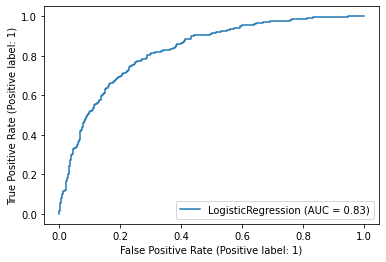

In [238]:
plot_roc_curve(lm,x_test_enc,y_test)

In [242]:
t = 0.5

print(classification_report(y_test,(y_test_pred[:,1]>t).astype(int)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



C:\Users\Dilransa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


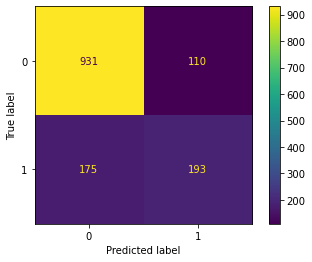

In [244]:
plot_confusion_matrix(lm,x_test_enc,y_test)

plt.show()

In [245]:
t = 0.4

print(classification_report(y_test,(y_test_pred[:,1]>t).astype(int)))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1041
           1       0.58      0.66      0.62       368

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.73      1409
weighted avg       0.80      0.79      0.79      1409

